In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container

Num_Points = 1


In [2]:
# Load Boston model

Boston_Data = BB_Model('Boston')

#Boston_Data.df().head()

In [3]:
Boston_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.593424840216018


MLPRegressor(random_state=RandomState(MT19937) at 0x202FE679840)

In [4]:
Boston_Data.Random_Forest()

0.8588424816770028


RandomForestRegressor(random_state=RandomState(MT19937) at 0x202FE679840)

In [5]:
print(Boston_Data.get_features())

['crime_rate', 'zoned_lots', 'industry', 'by_river', 'NOX', 'avg_rooms', 'pre_1940', 'emp_distance', 'rad_access', 'tax_rate', 'pupil_tea_rat', 'low_status']


In [6]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()


#Initializing the explainer object
Unravel_Exp = UR_Model(bbox_model           = Boston_Data.get_Random_Forest(),
                       train_data           = X_train,
                       feature_names        = Boston_Data.get_features(),
                       categorical_features = Boston_Data.get_catagorical(),
                       mode                 = Boston_Data.get_mode(),
                       sampling_method      = "Gaussian")       


In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [1.38123493e+00 1.27700831e+01 1.03192521e+01 8.58725762e-02
 5.41016066e-01 6.34393075e+00 6.57495845e+01 4.00201551e+00
 7.70637119e+00 3.75612188e+02 1.82263158e+01 1.14977008e+01]
Std 0:  [2.48792795e+00 2.39333051e+01 6.89946630e+00 2.80175796e-01
 1.13285815e-01 6.71332225e-01 2.77258953e+01 2.07770241e+00
 7.43035538e+00 1.51509503e+02 2.18500303e+00 6.23386724e+00]


In [8]:
#for i in range(5):
#    print(X_test[i,:])

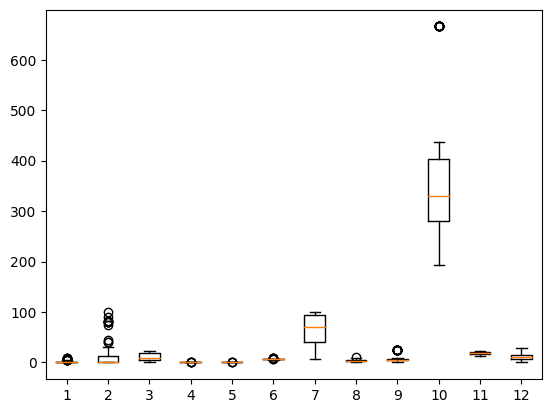

In [9]:
from matplotlib import pyplot
pyplot.boxplot(x=X_test)
pyplot.show()

INSTANCE:  0
crime_rate:	 0.05977
zoned_lots:	 0.07684
industry:	 0.05201
by_river:	 0.00000
NOX:	 0.00000
avg_rooms:	 0.00001
pre_1940:	 4.67211
emp_distance:	 0.00079
rad_access:	 1.82155
tax_rate:	 3.48567
pupil_tea_rat:	 0.00184
low_status:	 0.16226
[17.965] [1.79650000e+01 1.00000004e-05]


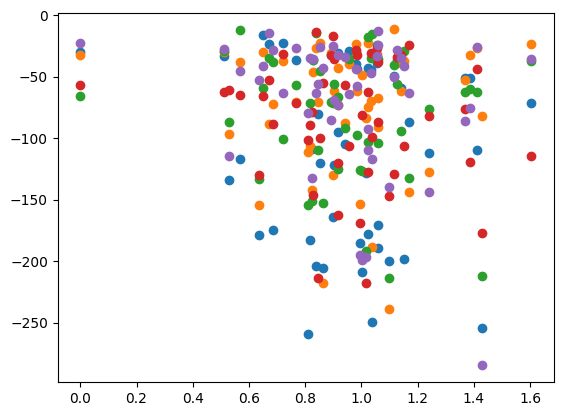

In [10]:
# Generate explantion data for Random Forest

Boston_Stats = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    Unravel_Exp.explain(X_init            = data_row,
                        alpha             = "FUR_W",
                        max_iter          = 5,
                        normalize         = False)
    
    scores = Unravel_Exp.permutation_importance(show_plot=False)
       
#    scores = Unravel_Exp.KL_imp(show_plot=False)
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.exp_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print(f_predict, e_predict)
    

    Boston_Stats.Add_Sample(sample_scores = scores,
                            outcome       = y_test[test_instance],
                            X_row         = data_row,
                            f_prediction  = f_predict,
                            e_prediction  = e_predict,
                            model         = Unravel_Exp.get_exp_model())
    

In [11]:
stop!!

<class 'SyntaxError'>: invalid syntax (C:/Users/deneb/AppData/Local/Temp/xpython_22768/1973022252.py, line 1)

In [12]:
#Default settings
#from unravel_2.ur_model import UR_Model

#X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()


#Initializing the explainer object
Unravel_Exp_LHC = UR_Model(bbox_model           = Boston_Data.get_Random_Forest(),
                           train_data           = X_train,
                           feature_names        = Boston_Data.get_features(),
                           categorical_features = Boston_Data.get_catagorical(),
                           mode                 = Boston_Data.get_mode(),
                           sampling_method      = "LatinHyperCube")       


INSTANCE:  0
crime_rate:	 0.02096
zoned_lots:	 0.06661
industry:	 0.02195
by_river:	 0.00000
NOX:	 0.00000
avg_rooms:	 0.00002
pre_1940:	 0.91410
emp_distance:	 0.00082
rad_access:	 2.24598
tax_rate:	 2.20814
pupil_tea_rat:	 0.00126
low_status:	 0.14921
[17.965] [1.79650000e+01 1.00000004e-05]


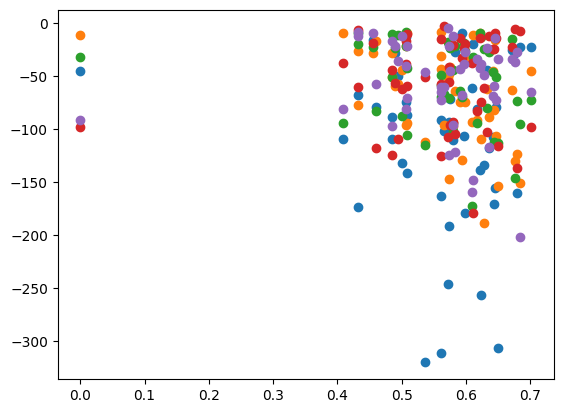

In [13]:
# Generate explantion data for Random Forest

Boston_S_LHC = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    Unravel_Exp_LHC.explain(X_init            = data_row,
                            alpha             = "FUR_W",
                            max_iter          = 5,
                            normalize         = False)
    
    scores = Unravel_Exp.permutation_importance(show_plot=False)
       
#    scores = Unravel_Exp.KL_imp(show_plot=False)
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.exp_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print(f_predict, e_predict)
    

    Boston_S_LHC.Add_Sample(sample_scores = scores,
                            outcome       = y_test[test_instance],
                            X_row         = data_row,
                            f_prediction  = f_predict,
                            e_prediction  = e_predict,
                            model         = Unravel_Exp.get_exp_model())
    

In [ ]:
stop!!

In [ ]:

Boston_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

In [ ]:
Boston_Stats.Frequency_Plot()

In [ ]:
Boston_Stats.Box_Plot()

In [ ]:
Boston_Stats.Violin_Plot(top_features=False)

In [ ]:
Boston_Container = Regression_Container(Boston_Stats, 5)

Boston_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


In [ ]:
Boston_Container.Frequency_Plot()

In [ ]:
Boston_Stats.Fidelity()

In [ ]:
Boston_Stats.Jaccard_Values()

In [ ]:
Boston_Stats.Reg_Fidelity_Graph()

In [ ]:
Boston_Stats.Consistancy(X_train=X_train)